In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/pau/Desktop/Fisidabo_Final/Codi/Astronomical Data'

In [3]:
cart = [pd.read_csv("../Data/"+str(i)+"Cart.csv") for i in range(1,5)] #Llegeixo fitxers

In [4]:
pol = [pd.read_csv("../Data/"+str(i)+"Pol.csv") for i in range(1,5)]
pol = [p.drop('Unnamed: 0', 1) for p in pol] #Una guarrada, trec a mà una columna que em sobra

In [5]:
aux = cart[0]

In [6]:
colors = np.linspace(0,1,10)

In [11]:
aux2 = pol[0]

In [14]:
plt.plot(aux2['phi'])

KeyError: 'phidot'

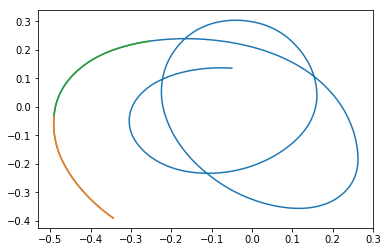

In [10]:
%matplotlib inline
plt.plot(aux.x,aux.y)
plt.plot(aux.x[:100],aux.y[:100])
plt.plot(aux.x[100:200],aux.y[100:200])

Hem de trobar: (semi)Període, perihelion precession, excentricitat i semieix major

In [7]:
z = list(pol[0]['r'])

In [8]:
len(z)

1043

In [9]:
for i in range(0,4):
    open("radi"+str(i+1)+".txt", "w").write(str(list(pol[i]['r'])))

In [10]:
#Trobem els màxims, per cada take
p = pol[0]

In [11]:
z = p.loc[abs(p['r-dot']) < 0.0027] #Aquestes precisions són amb prova i error 
z = z.loc[p['r-dotdot'] < 0] #obvi, no?
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
403,2.238889,5.061959,1.281938,-0.019233,0.386377,0.001929,-1.251190
643,3.572222,8.441927,1.815490,0.008452,0.309412,0.001614,-1.077273
920,5.111111,13.061033,1.653063,0.004167,0.312830,-0.000612,-0.619983


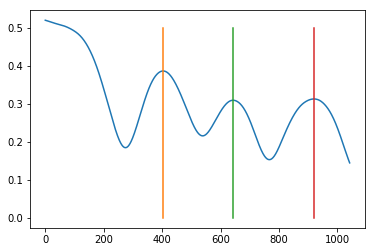

In [12]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5)) #Sempre va bé veure un gràfic :)

In [13]:
maxims_1 = z

In [14]:
p = pol[1]

In [15]:
z = p.loc[abs(p['r-dot']) < 0.0027]
z = z.loc[p['r-dotdot'] < 0]
z = z.drop(z.index[[3]]) #A vegades he tret els duplicates a mà
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
28,0.155556,0.257012,1.606302,-0.717342,0.400574,-0.001657,-0.836277
316,1.755556,4.221656,2.081260,0.506534,0.300785,0.000105,-0.631635
530,2.944444,7.658388,2.284474,-0.953660,0.261323,0.001013,-0.455887
825,4.583333,12.715063,2.255815,-1.373537,0.248730,0.001847,-0.894878
1049,5.827778,17.081513,2.856227,1.271863,0.197211,0.001673,-0.789028


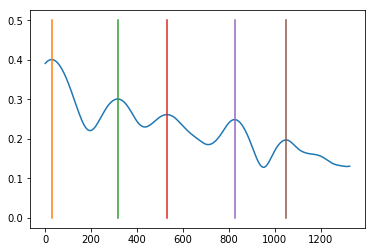

In [16]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5))

In [17]:
maxims_2 = z

In [18]:
p = pol[2]
z = p.loc[abs(p['r-dot']) < 0.0027]
z = z.loc[p['r-dotdot'] < 0]
z = z.drop(z.index[[1,-2]])
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
107,0.594444,1.297958,1.678572,-0.746134,0.363604,0.000282,-0.802746
426,2.366667,5.925370,2.005699,-0.401490,0.305283,-0.000409,-0.502898
673,3.738889,9.958287,1.795531,-0.180724,0.242513,-0.002499,-1.068311
888,4.933333,13.842392,1.806601,-1.044155,0.249192,0.001887,-1.221248
1136,6.311111,18.739458,2.436638,-0.860047,0.204701,-0.001581,-0.686295


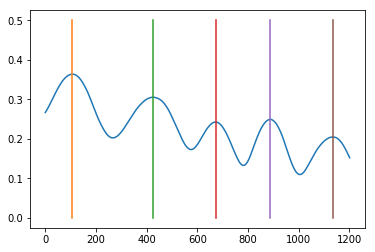

In [19]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5))

In [20]:
maxims_3 = z

In [21]:
p = pol[3]
z = p.loc[abs(p['r-dot']) < 0.003]
z = z.loc[p['r-dotdot'] < 0]
z

,t,phi,omega,alpha,r,r-dot,r-dotdot
241,1.338889,3.683203,1.675956,0.758169,0.378450,-0.000049,-0.850489
532,2.955556,7.960408,1.517275,-0.883836,0.325926,-0.002871,-1.141231


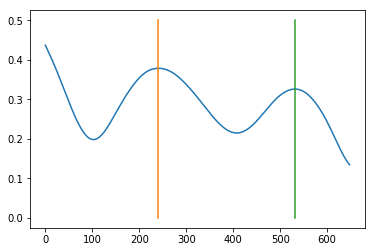

In [22]:
%matplotlib inline
plt.plot(p['r'])
for i in z.index.tolist():
    plt.plot((i,i), (0, 0.5))


In [23]:
maxims_4 = z

In [24]:
maxims = [maxims_1, maxims_2, maxims_3, maxims_4]

In [25]:
#Semiperíode

In [26]:
i = 0
for dataset in maxims:
    i+=1
    v = dataset.index.tolist() #en aquest vector només hi ha els màxims (les seves posicions, de fet)
    for index in range(len(v)-1):
        print(i, float(dataset.iloc[[index+1]]['t']) - float(dataset.iloc[[index]]['t'])) #crec que prou obvi, suda del float

1 1.3333333329999997
1 1.5388888890000008
2 1.5999999999999943
2 1.18888888888889
2 1.6388888888888795
2 1.24444444444444
3 1.772222222222217
3 1.37222222222222
3 1.1944444444444402
3 1.3777777777777702
4 1.61666666666666


In [27]:
#Perihelion Precession

In [33]:
i = 0
for dataset in maxims:
    i+=1
    v = dataset.index.tolist()
    for index in range(len(v)-1): #en aquest vector només hi ha els màxims
        print(i, float(dataset.iloc[[index+1]]['phi']) - float(dataset.iloc[[index]]['phi']) - np.pi) #ídem, però estàs segur del 2pi? surten coses rares

1 0.23837572900394743
1 1.477513098520225
2 0.8230514601967909
2 0.29513904069555785
2 1.9150828971629164
2 1.224856565032507
3 1.4858190969153968
3 0.8913245927200277
3 0.7425115560023148
3 1.755473490530708
4 1.1356126735942276


In [34]:
#Semieix major

In [35]:
i = 0
l = [] #m'ho guardaré tot en un vector, que els necessito per despres l'eccentricitat
for dataset in maxims:
    i+=1
    v = dataset.index.tolist()
    for index in range(len(v)-1):
        print(i, (float(dataset.iloc[[index+1]]['r']) + float(dataset.iloc[[index]]['r']))/2)
        l.append((float(dataset.iloc[[index+1]]['r']) + float(dataset.iloc[[index]]['r']))/2)

1 0.347894693513415
1 0.31112112539639253
2 0.3506796802872085
2 0.281054332025614
2 0.255026405797552
2 0.22297009467388001
3 0.33444365529036946
3 0.273898072417711
3 0.245852281370607
3 0.2269463589800905
4 0.35218807358550297


In [36]:
#Excentricitat

In [37]:
i = 0
aux = []
for dataset in maxims:
    i+=1
    v = dataset.index.tolist()
    for index in range(len(v)-1):
        aux.append((i, (v[index]+v[index+1])*0.5))

In [38]:
aux

[(1, 523.0),
 (1, 781.5),
 (2, 172.0),
 (2, 423.0),
 (2, 677.5),
 (2, 937.0),
 (3, 266.5),
 (3, 549.5),
 (3, 780.5),
 (3, 1012.0),
 (4, 386.5)]

Aquí faig mitja triquinyuela de dir bueno, (ta+tb)/2 no te pq ser un punt de datasets, em sumo els indexs i parteixo per dos, i si es imparell, fare la mitjana dels dos del costat

In [39]:
def enter(a):
    return int(a) == int(a+0.6) #una guarrada, torna true si és .0, false si 0.5

In [40]:
radis = []  #també mels guardo en un vector
for parella in aux:
    dataset = pol[parella[0]-1] #simplement marcar d'on agafo les dades, el -1 pq al vector són 0:3
    if enter(parella[1]):
        radi = dataset['r'][int((parella[1]))] #tot ok
    else:
        radi = (dataset['r'][int((parella[1]+0.5))] + dataset['r'][int((parella[1]+0.5))])/2 #La cosa sidosa
    print(parella[0], radi)
    radis.append((parella[0], radi)) #també mels guardo en un vector

1 0.223170320032
1 0.16075473742
2 0.232242009707
2 0.231475292139
2 0.193894123642
2 0.133992227476
3 0.202477371532
3 0.187233573519
3 0.132937038275
3 0.110908628434
4 0.222437796569


El següent pot tenir una mica de sidilla, radis[i][0] es nomes l'index (1,2,3 o 4), i radis[i][1] al valor de la seva dreta de la cel·la de dalt.

In [41]:
len(radis) == len(l) #tot ok? tot ok

True

In [42]:
excentricitats = [(radis[i][0],(np.sqrt(1-((radis[i][1]**2)/(l[i]**2))))) for i in range(len(radis))] 

RESULTATS FINALS

## Semiperíode (s)
1 1.3333333329999997
1 1.5388888890000008
2 1.5999999999999943
2 1.18888888888889
2 1.6388888888888795
2 1.24444444444444
3 1.772222222222217
3 1.37222222222222
3 1.1944444444444402
3 1.3777777777777702
4 1.61666666666666

## Perihelion precession (rads/0.5rev)
1 0.23837572900394743
1 1.477513098520225
2 0.8230514601967909
2 0.29513904069555785
2 1.9150828971629164
2 1.224856565032507
3 1.4858190969153968
3 0.8913245927200277
3 0.7425115560023148
3 1.755473490530708
4 1.1356126735942276

##  Semieixos majors (metres)
1 0.347894693513415
1 0.31112112539639253
2 0.3506796802872085
2 0.281054332025614
2 0.255026405797552
2 0.22297009467388001
3 0.33444365529036946
3 0.273898072417711
3 0.245852281370607
3 0.2269463589800905
4 0.35218807358550297

## Excentricitats
1 0.76713295171
1 0.856169522906
2 0.749271880628
2 0.567176539821
2 0.649583354233
2 0.799292184731
3 0.795909590917
3 0.7298676301
3 0.841203182051
3 0.872452036702
4 0.775304115012

